In [11]:
import argparse
import csv
import datetime
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import sardine
import torch

from agents.wrappers import IdealState
from pymoo.indicators.hv import HV
from distutils.util import strtobool

In [18]:

# read csv file 
data = pd.read_csv("results/results.csv")
data.columns

Index(['agent', 'ranker', 'env-id', 'slate size', 'num items', 'reward-type',
       'clicks', 'clicks_std', 'diversity', 'diversity_std',
       'catalog coverage', 'catalog_coverage_std', 'runtime', 'runtime_std'],
      dtype='object')

In [33]:
data_10= data[data["slate size"]==10]
data_10_1000 = data_10[data_10["num items"]==100]
data_10_1000_slatetopk = data_10_1000[data_10_1000["env-id"]=="sardine/SlateTopK-Bored-v0"]
data_10_1000_slatetopk[["agent","diversity", "clicks", "catalog coverage", "runtime"]]

df = data_10_1000_slatetopk[["agent","diversity", "clicks", "catalog coverage", "runtime"]].copy().reset_index(drop=True)

0
1
2
3


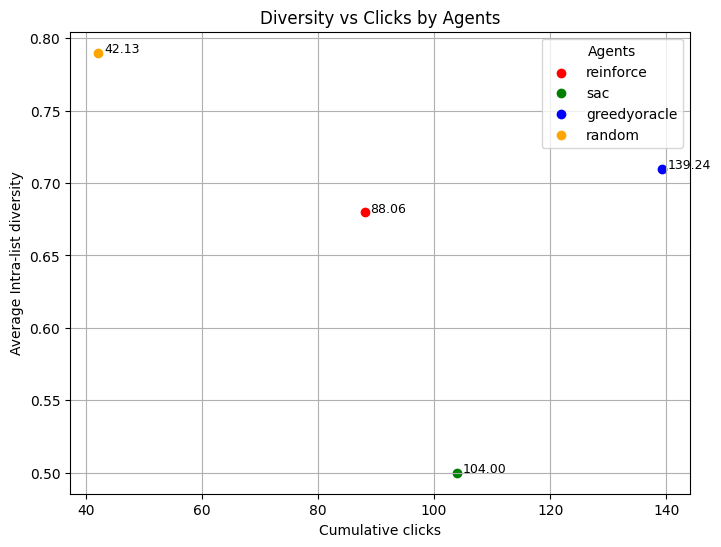

In [34]:
# Plotting diversity vs clicks with a legend for agent names
plt.figure(figsize=(8, 6))

# Color mapping for agents
colors = ['red', 'green', 'blue', 'orange']

# Scatter plot with different colors for each agent
for i, row in df.iterrows():
    print(i)
    plt.scatter(row["clicks"], row["diversity"], color=colors[i], label=row["agent"])
    # Adding catalog coverage next to each point
    plt.text(row["clicks"] + 1, row["diversity"], f'{row["clicks"]:.2f}', fontsize=9, ha='left')



# Plot styling
plt.xlabel("Cumulative clicks")
plt.ylabel("Average Intra-list diversity")
plt.title("Diversity vs Clicks by Agents")

# Adding a legend to show agent names
plt.legend(title="Agents")

# Display the plot
plt.grid(True)
plt.show()
